In [1]:
#Emily Shepherd
#911 Capstone Project
#Data Science Bootcamp Course


In [47]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load Data
calls = pd.read_csv('911.csv')

In [5]:
#Check data
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Determine top five zip codes for 911 calls
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
#Determine top five townships for 911 calls
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
len(calls['title'].unique())

110

In [13]:
#Recategorize Data According to EMS, Fire, or Traffic call
def title(x):
    if 'ems' in x.lower():
        return 'EMT'
    if 'fire' in x.lower():
        return 'Fire'
    if 'traffic'in x.lower():
        return 'Traffic'
    return ''


In [14]:
calls['Reason'] = calls['title'].apply(lambda x: title(x))

In [15]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMT
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMT
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMT
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMT


<AxesSubplot:xlabel='Reason', ylabel='count'>

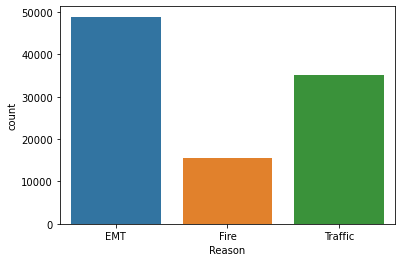

In [16]:
sb.countplot(x='Reason',data=calls)

In [20]:
#Convert timeStamp to dateTime and check to make sure it worked
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])
type(calls['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
#Create columns for hours, seconds, minutes, day of the week and month
calls['hour'] = calls['timeStamp'].apply(lambda x: x.hour)
calls['minute'] = calls['timeStamp'].apply(lambda x: x.minute)
calls['second'] = calls['timeStamp'].apply(lambda x: x.second)
calls['dayOfWeek'] = calls['timeStamp'].apply(lambda x: x.dayofweek)
calls['Month'] = calls['timeStamp'].apply(lambda x: x.month)
calls.head()
type(calls['dayOfWeek'][0])

numpy.int64

In [33]:
#Convert Days of Week from int to String
day_dict = {0:"Mon",1: 'Tues', 2: 'Wed', 3: 'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['dayOfWeek'] = calls['dayOfWeek'].map(day_dict)
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,minute,second,dayOfWeek,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMT,17,40,0,Thu,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMT,17,40,0,Thu,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,40,0,Thu,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMT,17,40,1,Thu,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMT,17,40,1,Thu,12


<AxesSubplot:xlabel='dayOfWeek', ylabel='count'>

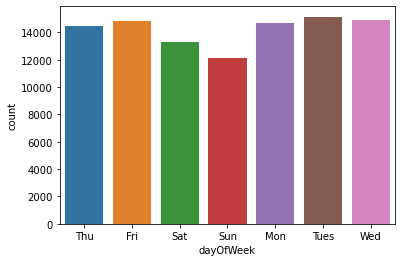

In [34]:
sb.countplot(x = 'dayOfWeek', data = calls)

<AxesSubplot:xlabel='Month', ylabel='count'>

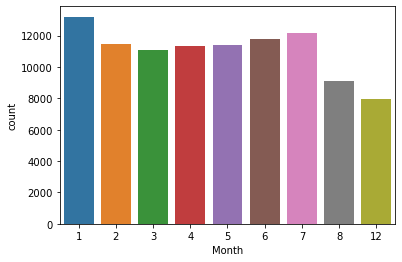

In [36]:
sb.countplot(x = 'Month', data = calls)

<AxesSubplot:xlabel='Month'>

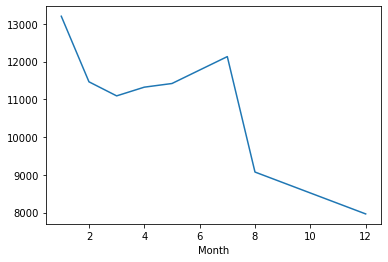

In [37]:
#Make a line plot to fill in missing months
byMonth = calls.groupby("Month").count()
byMonth["twp"].plot()


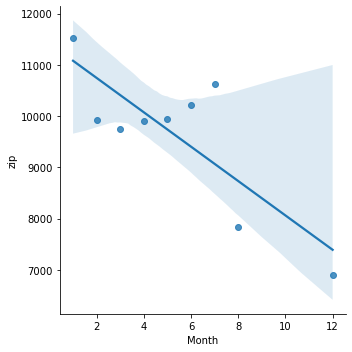

In [38]:
#Create Linear Model and Scatterplot
byMonth = byMonth.reset_index()
sb.lmplot(x = "Month", y = 'zip', data = byMonth)
#Not really linear

In [43]:
#Create Date Column
calls['Date'] = calls['timeStamp'].apply(lambda x: x.date())
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,minute,second,dayOfWeek,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMT,17,40,0,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMT,17,40,0,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,40,0,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMT,17,40,1,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMT,17,40,1,Thu,12,2015-12-10


<AxesSubplot:xlabel='Date', ylabel='title'>

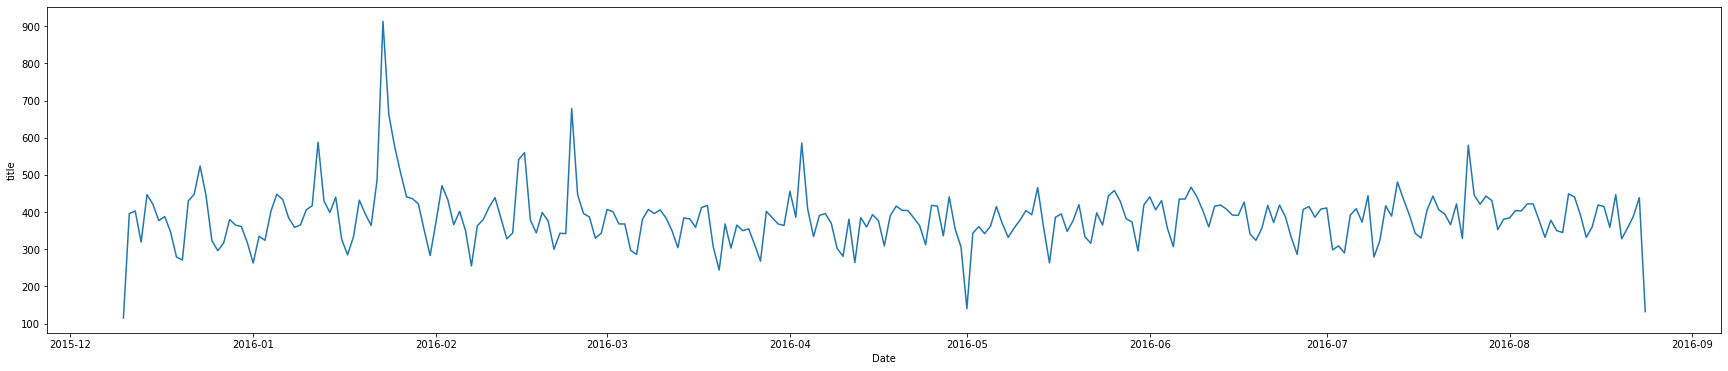

In [67]:
plt.figure(figsize = (30,6))
byDate = df.groupby('Date').count()
byDate.head()
sb.lineplot(x = 'Date', y = 'title', data = byDate )

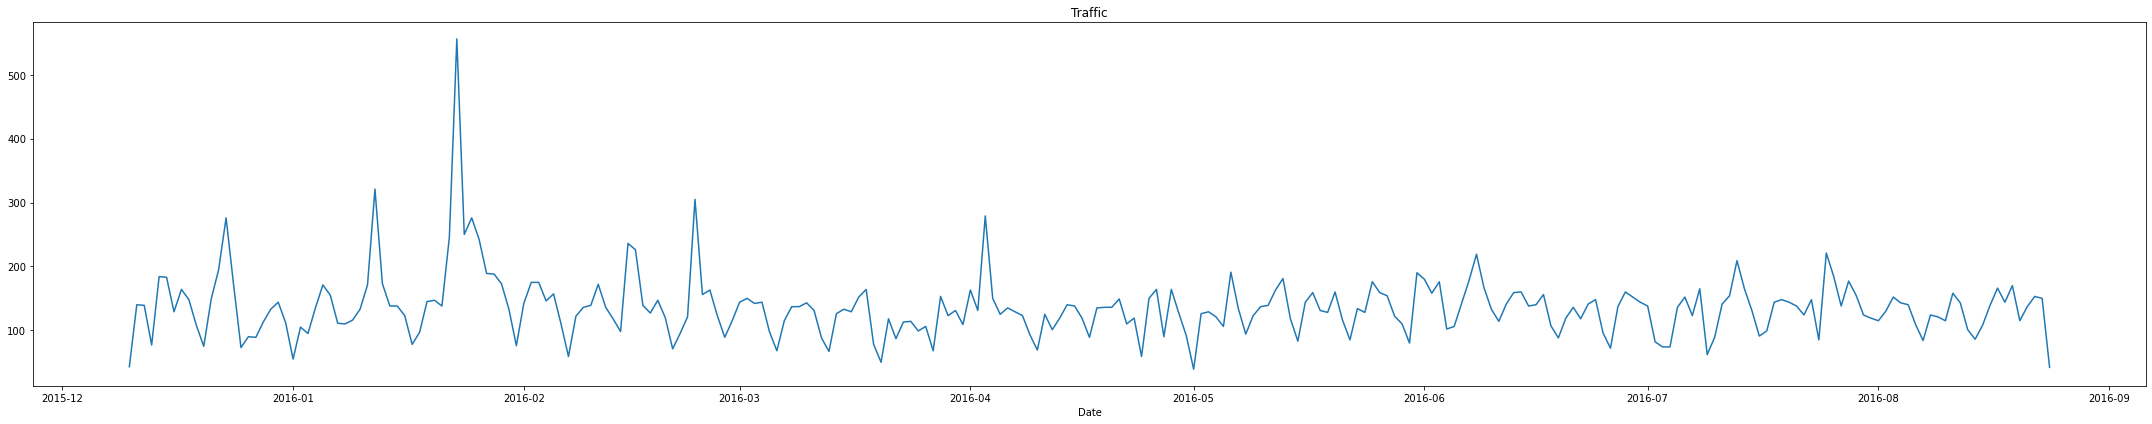

In [66]:
plt.figure(figsize = (30,6))
calls[calls['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Text(0.5, 1.0, 'Fire')

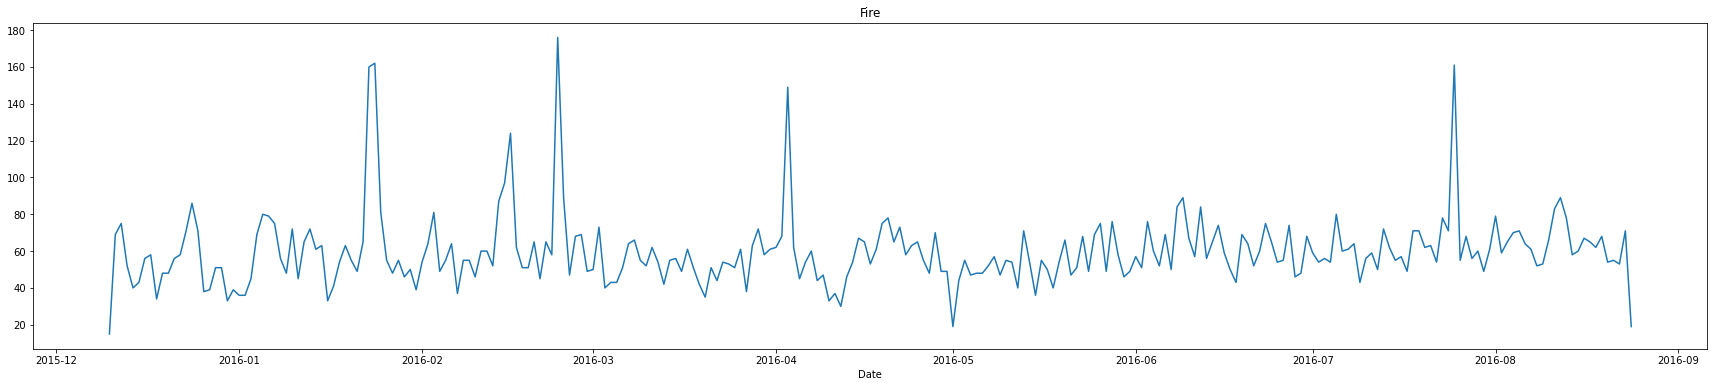

In [64]:
plt.figure(figsize = (30,6))
calls[calls['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')



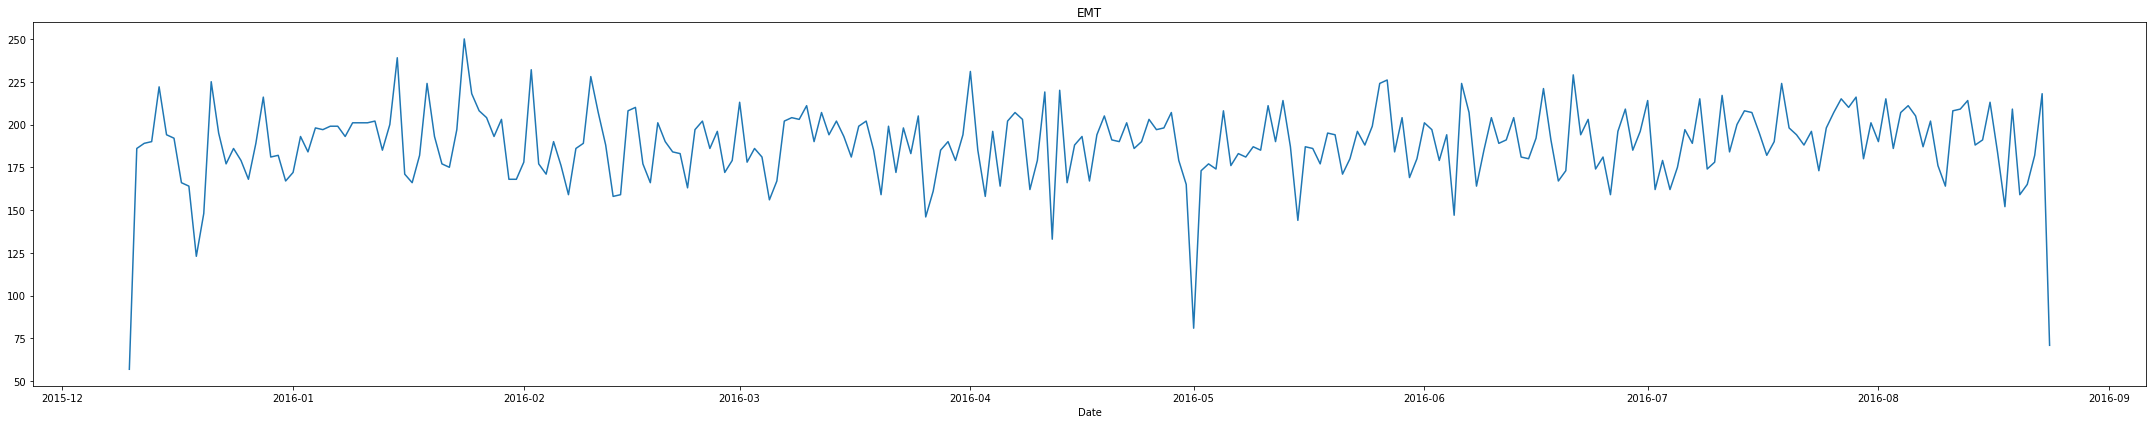

In [65]:
plt.figure(figsize = (30,6))
calls[calls['Reason']=='EMT'].groupby('Date').count()['twp'].plot()
plt.title('EMT')
plt.tight_layout()

In [52]:
#Restructure data so day of week is index
dayHour = calls.groupby(by=['dayOfWeek','hour']).count()['Reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='dayOfWeek'>

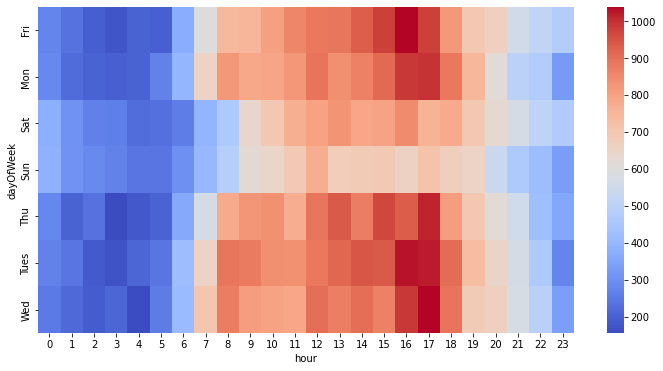

In [55]:
#Create a heatmap with day of the week and hour of the day
plt.figure(figsize=(12,6))
sb.heatmap(dayHour,cmap='coolwarm')

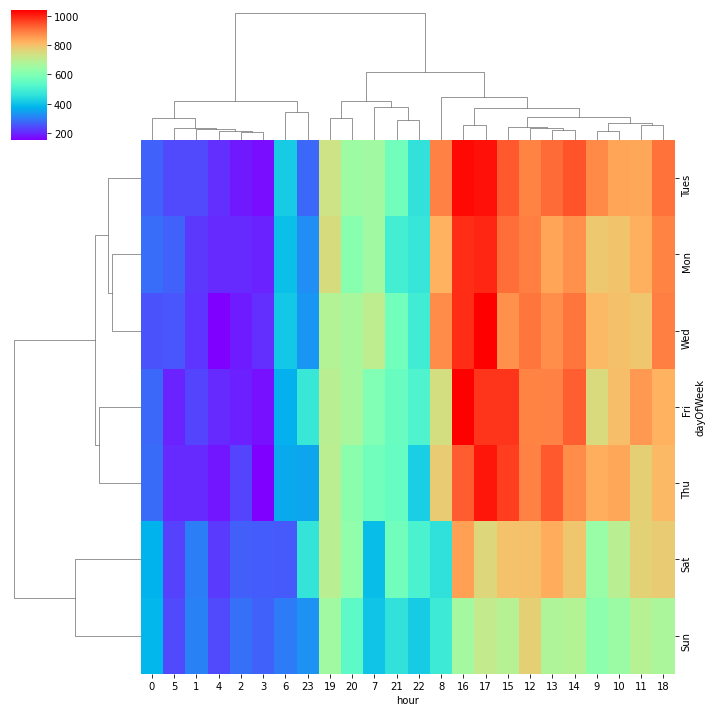

In [68]:
sb.clustermap(dayHour,cmap='rainbow')